In [64]:
import numpy as np
import scipy as scy
import qutip as qt

from matplotlib import pyplot as plt

from numpy import linalg as LA

from sympy.physics.quantum.cg import CG
from sympy import S

%matplotlib inline

In [2]:
# fxn for nice plots
def get_ax(figsize=(6,4)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax

part (a)

In [3]:
# fxn for weak Zeeman hamiltonian
def weak_H_Zee(B, F, m_F, J, S=1/2, L=1, I=1/2):
    # F=0 -> no Zeeman effect and divison by 0 so we ignore it
    if F != 0:
        # calculate g_J
        g_J_num = S * (S+1) - L * (L+1)
        g_J_den = 2 * J * (J+1)
        g_J = (g_J_num / g_J_den) + 3/2
        # g_J = ((-5/4) / g_J_den) + 3/2

        # calculate g_F
        g_F_num = F * (F+1) + J * (J+1) - I * (I+1)
        g_F_den = 2 * F * (F+1)
        g_F = (g_F_num / g_F_den) * g_J
        
        # Zeenam energy shift
        return B * g_F * mu_B * g_F * m_F

In [4]:
# fxn for fine structure E shift
# in eV?
def H_fine(J, n=2, Z=2):
    alpha = 1/137
    prefactor = Z**2 * alpha**2/(n**2)
    
    denominator = J+1/2
    return prefactor * (3/(n*4) - n/denominator)

Text(0, 0.5, '$E$ (eV)')

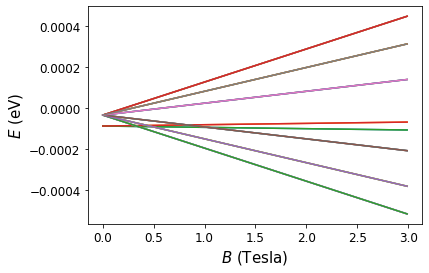

In [5]:
# constants
mu_B = 5.788 * 10**(-5) # eV/T
n = 2
S = 1/2
I = 1/2
L = 1

# need S, m_s, L, m_l, F, m_F, m_I
# make a list of all states w/ the above QNs
state_list=[]
# J = L +- S
for J in [1/2, 3/2]:
    # m_J = J, J-1, ..., -J
    for m_J in np.arange(-J, J+1, 1):
        # F = J +- I
        for F in [J-I, J+I]:
            # m_F = F, F-1
            for m_F in np.arange(-F, F+1, 1):
                state={"J":J, "m_J":m_J, "F":F, "m_F":m_F, "E(B)":[]}
                state_list.append(state)

# list of B feild values to plot over
B_list = np.arange(0, 3, 10**(-2))

# calc E(B) for each state over all B's and plot
for state in state_list:
    F = state["F"]
    m_F = state["m_F"]
    J = state["J"]
    # no Zeeman effect if F or m_F = 0
    if F != 0 and m_F != 0:
        for B in B_list:
            # E(B) from weak Zeeman Hamiltonian and FS splitting
            state["E(B)"].append(weak_H_Zee(B, F, m_F, J)+H_fine(J))

        plt.plot(B_list, state["E(B)"])

# plot options
# TODO: line labels
fSize=15
plt.xticks(size=fSize-3)
plt.yticks(size=fSize-3)

plt.xlabel("$B$ (Tesla)", fontsize=fSize)
plt.ylabel("$E$ (eV)", fontsize=fSize)

part (b)

In [6]:
#-0.00011321860514678458 #'J': 0.5, 'm_J': -0.5, 'F': 1.0, 'm_F': -1.0
#-0.00011321860514678458 #'J': 0.5, 'm_J': -0.5, 'F': 1.0, 'm_F': 1.0
#-2.2643721029356917e-05 #'J': 1.5, 'm_J': -1.5, 'F': 1.0, 'm_F': -1.0
#-2.2643721029356917e-05 #'J': 1.5, 'm_J': -1.5, 'F': 2.0, 'm_F': -2.0

In [7]:
# constants (atomic units)
g_p = 5.59
n = 2
h = 2*np.pi
alpha_sqrd = (1/137)**2
m = 1
m_p = 1800
e_h = 1
f = [1,2]

exp_a_f1 = []
exp_a_f2 = []

j = [1/2, 3/2]

# for f = 1, j = 1/2, 3/2, for f = 2, j = 1/2

# TODO: what is this / where did we find it?
for i in range(len(f)):
    if f[i] == 1:
        for k in range(len(j)):
            A = (g_p)/(h * n**3 * j[k] * (j[k] + 1) * 3) * e_h * alpha_sqrd * (m/m_p)
            exp_a_f1.append(A)
    else:
        A = (g_p)/(h * n**3 * j[0] * (j[0] + 1) * 3) * e_h * alpha_sqrd * (m/m_p)
        exp_a_f2.append(A)

In [8]:
exp_a_f1, exp_a_f2

([1.4630049482100032e-09, 2.926009896420006e-10], [1.4630049482100032e-09])

In [9]:
# TODO: what is this / where did we find it?
# fxn for strong Zeeman hamiltonian
def strong_h_zee(B, J, m_s, m_l, m_I, S=1/2, L=1, I=1/2):
    # F=0 -> no Zeeman effect and divison by 0 so we ignore it
    if F != 0:
        m_J = m_s + m_l
        # calculate g_J
        g_J_num = S * (S+1) - L * (L+1)
        g_J_den = 2 * J * (J+1)
        g_J = (g_J_num / g_J_den) + 3/2
        # g_J = ((-5/4) / g_J_den) + 3/2

        # calc g_F
        g_F_num = F * (F+1) + J * (J+1) - I * (I+1)
        g_F_den = 2 * F *(F+1)
        g_F = (g_F_num / g_F_den) * g_J
        
        A = (g_p)/(h * n**3 * J * (J + 1) * 3) * e_h * alpha_sqrd * (m/m_p)
        
        return B * g_J * mu_B * m_J + (m_I * m_J * A)

Text(0, 0.5, '$E$ (Hartree)')

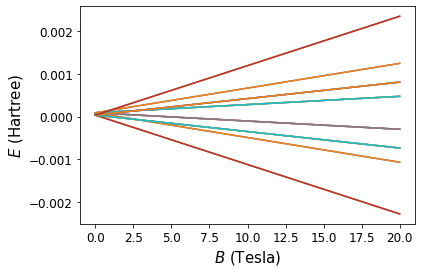

In [10]:
# constants
n = 2
S = 1/2
I = 1/2
L = 1

# need J, m_s, m_l, m_I
# make a list of all states w/ the above QNs
state_list=[]
for J in [1/2, 3/2]:
    for m_s in [-1/2, 1/2]:
        for m_l in [-1, 0, 1]:
            for m_I in [-1/2, 1/2]:
                state={"J":J, "m_s":m_s, "m_l":m_l, "m_I":m_I, "E(B)":[]}
                state_list.append(state)

# list of B feild values to plot over
B_list = np.arange(0, 20, 10**(-2))

# calc E(B) for each state over all B's and plot
for state in state_list:
    J = state["J"]
    m_s = state["m_s"]
    m_l = state["m_l"]
    m_I = state["m_I"]
    for B in B_list:
        # E(B) from strong Zeeman Hamiltonian and FS splitting
        state["E(B)"].append(strong_h_zee(B, J, m_l, m_s, m_I)-H_fine(J))

    plt.plot(B_list, state["E(B)"])

# plot options
# TODO: line labels
fSize=15
plt.xticks(size=fSize-3)
plt.yticks(size=fSize-3)

plt.xlabel("$B$ (Tesla)", fontsize=fSize)
plt.ylabel("$E$ (Hartree)", fontsize=fSize)

part c

In [81]:
# see Ed's mathmatica notebook
# constants
alpha = 1/137
m_p = 938 # MeV/c^2
m_e = 0.511 # MeV/c^2
g_p = 9.2
S=1/2
I=1/2
E_H = 1
g_l = 1
g_S = 2.0023
g_I = -1.521*10**(-3)
mu_B = 5.788*10**(-5) # eV/T

# fxns to make the Hamiltonians
# Bohr
def E_n(n):
    return -E_H / (n**2)

# fine structure
def E_fs(n, j):
    frac1 = (alpha**2)/(n**2)
    frac2 = n / (j+1/2)
    return E_n(n) * (1 - frac1 * ((3/4) - frac2))

# hyperfine A
def A(n, l, j):
    num = g_p * E_H * alpha**2 * (m_e/m_p)
    den = (n**3) * j * (j+1) * (2*l + 1)
    return num / den
# hf structure
def E_hfs(n, l, j, f):
    fact1 = A(n, l, j) / 2
    fact2 = (f * (f+1) - i * (i+1) - j * (j+1))
    return fact1 * fact2
# Zeeman
def E_zee(m_l, m_s, m_i):
    # needs to be multiplied by B
    return g_l*m_l + g_S*m_s + g_I*m_I 

In [102]:
# Hamiltonians functions
# fine structure
def H_fs(n, nprime, l, lp, j, jp, m_j, m_jp, m_i, m_ip):
    # dirac deltas
    if n == nprime and l == lp and j == jp and m_j == m_jp and m_i == m_ip:
        return E_fs(n, j)
    else:
        return 0

# hf structure
def H_hfs(n, nprime, l, lp, m_j, m_jp, m_i, m_ip):
    # dirac delta
    if j == jp:
        # double sum over f and m_f
        tot = 0
        for f in np.arange(np.abs(i-j), i+j+1):
            subtot = 0
            for m_f in np.arange(-f, f+1):
                # cleb coefs
                cg1 = CG(j, m_j, i, m_i, f, m_f).doit()
                cg2 = CG(j, m_jp, i, m_ip, f, m_f).doit()
                value = cg1 * E_hfs(n, l, j, f) * cg2
                subtot += value
            tot += subtot
        return tot
    else:
        return 0

# Zeeman
def H_zee(B, n, nprime, l, lp, j, jp, m_j, m_jp, m_i, m_ip):
    # dirac deltas
    if n == nprime and m_i == m_ip:
        # double sum over m_l and m_s
        tot = 0
        for ml in np.arange(-l, l+1):
            subtot = 0
            for ms in np.arange(-S, S+1):
                # cleb coefs
                cg1 = CG(l, m_l, S, m_s, j, m_j).doit()
                cg2 = CG(l, m_l, S, m_s, jp, m_jp).doit()
                value = cg1 * E_zee(m_l, m_s, m_i)
                subtot += value
            tot += subtot
        return B * tot
    else:
        return 0
    
# add all together
def H_fxn(B, n, nprime, l, lp, j, jp, m_j, m_jp, m_i, m_ip):
    return H_fs(n, nprime, l, lp, j, jp, m_j, m_jp, m_i, m_ip) + H_hfs(n, nprime, l, lp, m_j, m_jp, m_i, m_ip) + H_zee(B, n, nprime, l, lp, j, jp, m_j, m_jp, m_i, m_ip)

In [92]:
# QNs are
# n, l, j, m_j, m_i
# make a list of the basis states
state_list = []
for j in [1/2, 3/2]:
    for m_j in np.arange(-j, j+1):
        for m_i in [-1/2, 1/2]:
            state = {"n":2, "j":j, "m_j":m_j, "m_i":m_i}
            state_list.append(state)

In [103]:
# empty matrix
H_mat = np.zeros((12,12))
# B field strength
B=0
# loop over the state list for x,y axies
for k in np.arange(1, len(state_list)):
    for kp in np.arange(0, len(state_list)):
        # constants
        n = 2
        nprime = 2
        l = 1
        lp = 1
        
        # get QNs
        j = state_list[k]["j"]
        jp = state_list[kp]["j"]
        
        m_j = state_list[k]["m_j"]
        m_jp = state_list[kp]["m_j"]
        
        m_i = state_list[k]["m_i"]
        m_ip = state_list[kp]["m_i"]
        
        # matrix elements found using the hamiltonian function
        H_mat[k][kp] = H_fxn(B, n, nprime, l, lp, j, jp, m_j, m_jp, m_i, m_ip)

In [104]:
# 0.25... looks similar to Ed's but something is wrong
print(H_mat)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -0.25000416  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.         -0.25000416  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.25000416  0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         -0.25000083  0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.25000083
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.25000083  0.          0.          0.          0.          0.        ]
 [ 0.

In [105]:
# eigenvalues
LA.eig(H_mat)[0]

array([ 0.        , -0.25000416, -0.25000416, -0.25000416, -0.25000083,
       -0.25000083, -0.25000083, -0.25000083, -0.25000083, -0.25000083,
       -0.25000083, -0.25000083])